Case 0: AmundsenSea
  Location: /Users/asc/src/Shingle/test/Amundsen_Sea/Amundsen_Sea.brml
  Comment: Use the RTopo dataset, 50S version (RTopo105b 50S.nc), selecting the region [-130.0:-85.0,-85.0:-60.0] for the Amundsen Sea, extended up to the 64S parallel. Ice shelf ocean cavities are included.

Case 1: AmundsenSeafine
  Location: /Users/asc/src/Shingle/test/Amundsen_Sea_fine/Amundsen_Sea_fine.brml
  Comment: Use the RTopo dataset, 50S version (RTopo105b 50S.nc), selecting the region [-130.0:-85.0,-85.0:-60.0] for the Amundsen Sea, extended up to the 64S parallel. Ice shelf ocean cavities are included.

Case 2: Antarcticaall
  Location: /Users/asc/src/Shingle/test/Antarctica_all/Antarctica_all.brml
  Comment: Use the RTopo dataset (RTopo105b.nc), considering all land masses up to a latitude of 60S, extended up to the 50S parallel. Ice shelf ocean cavities are included. Spatial representation is specified along the open ocean boundary to ensure it is well-represented.

Case 3: Antarc

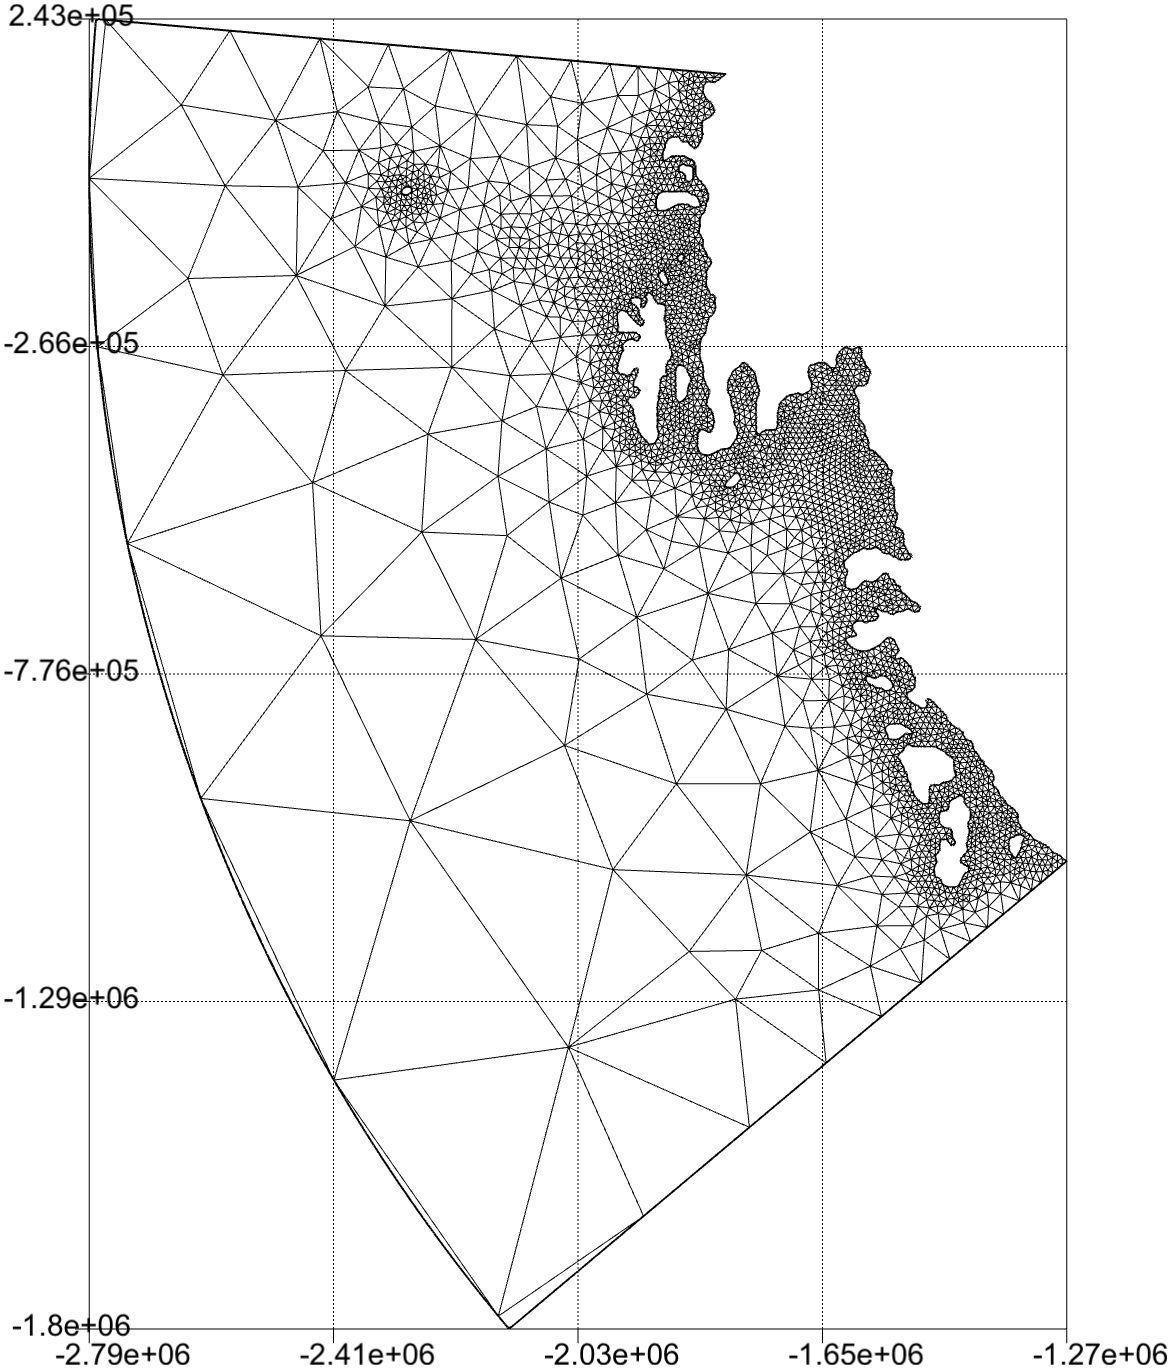

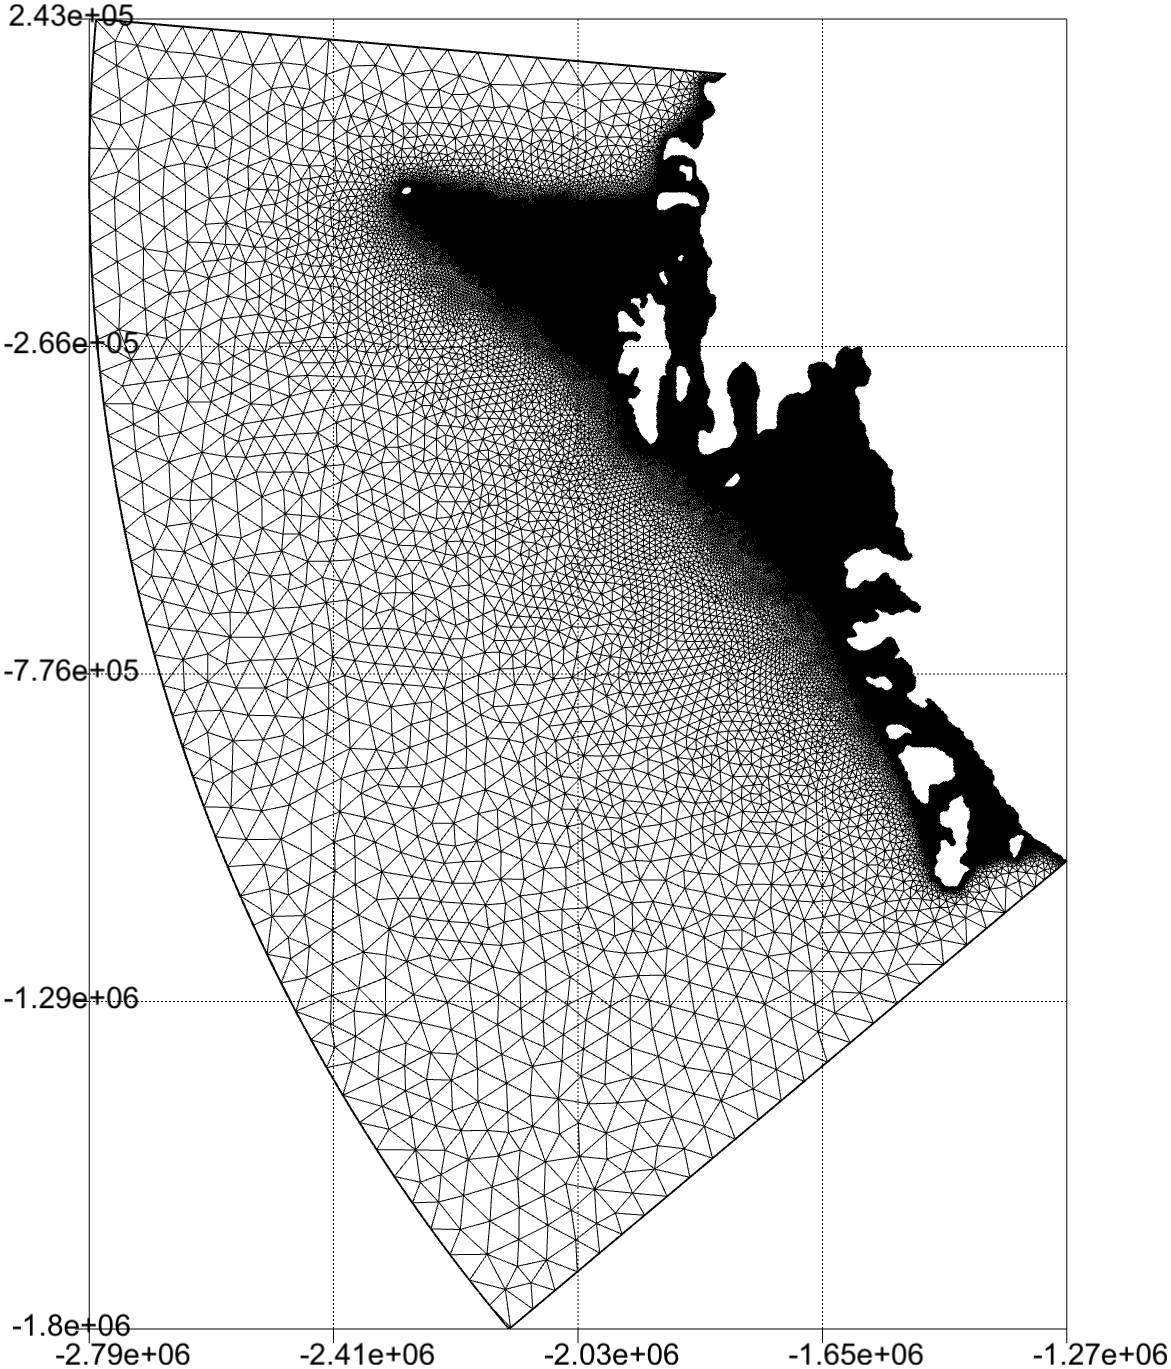

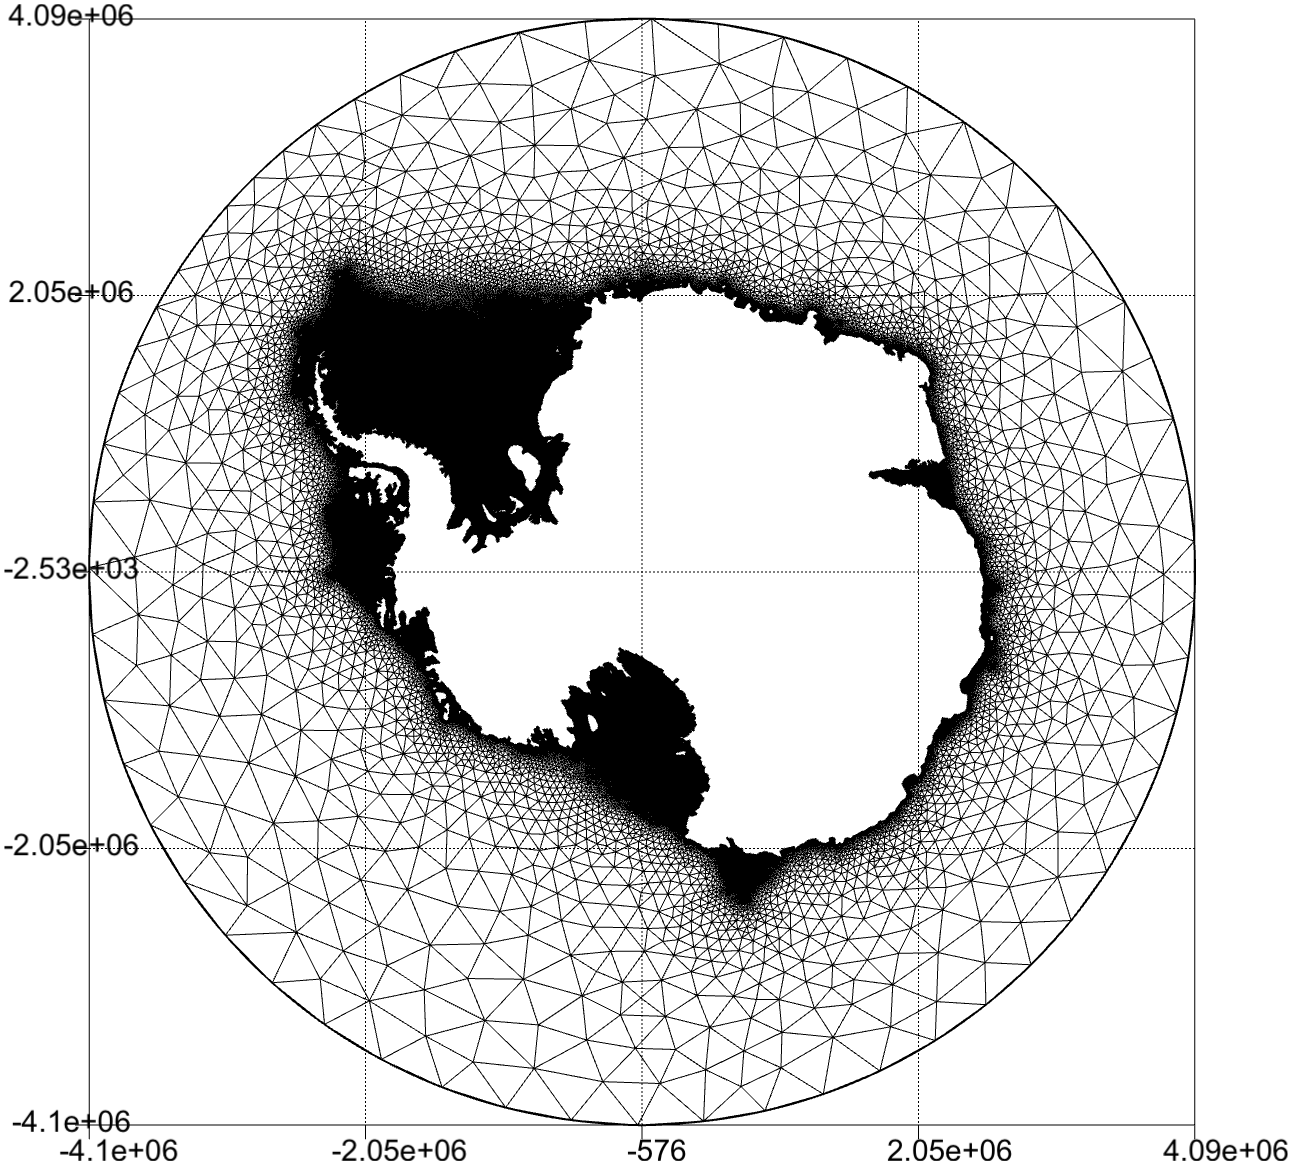

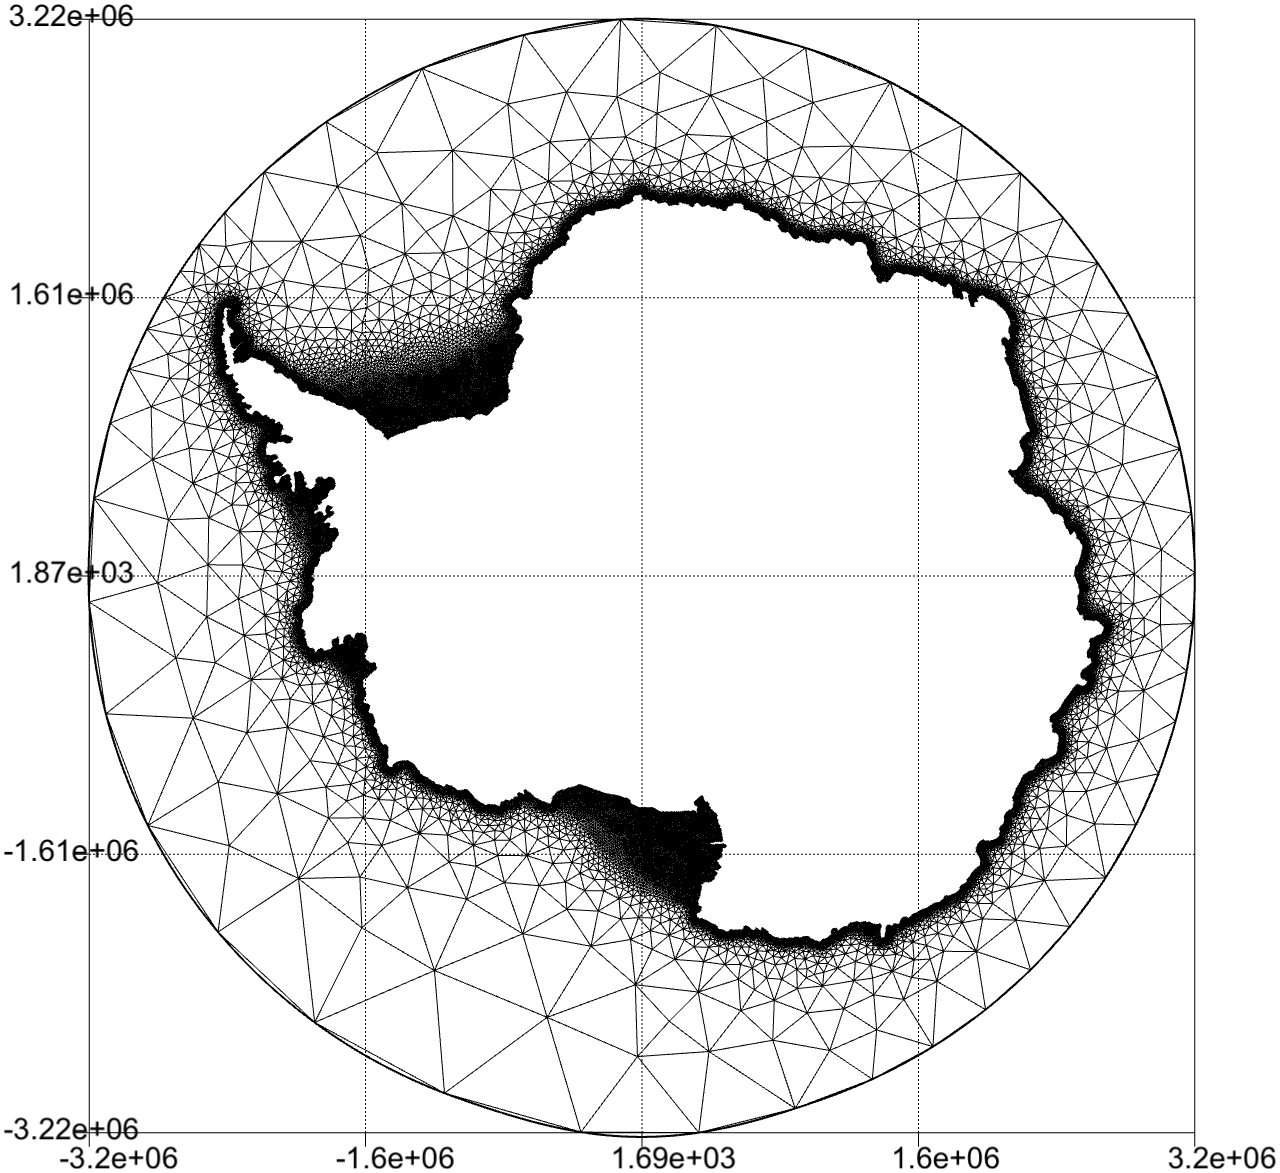

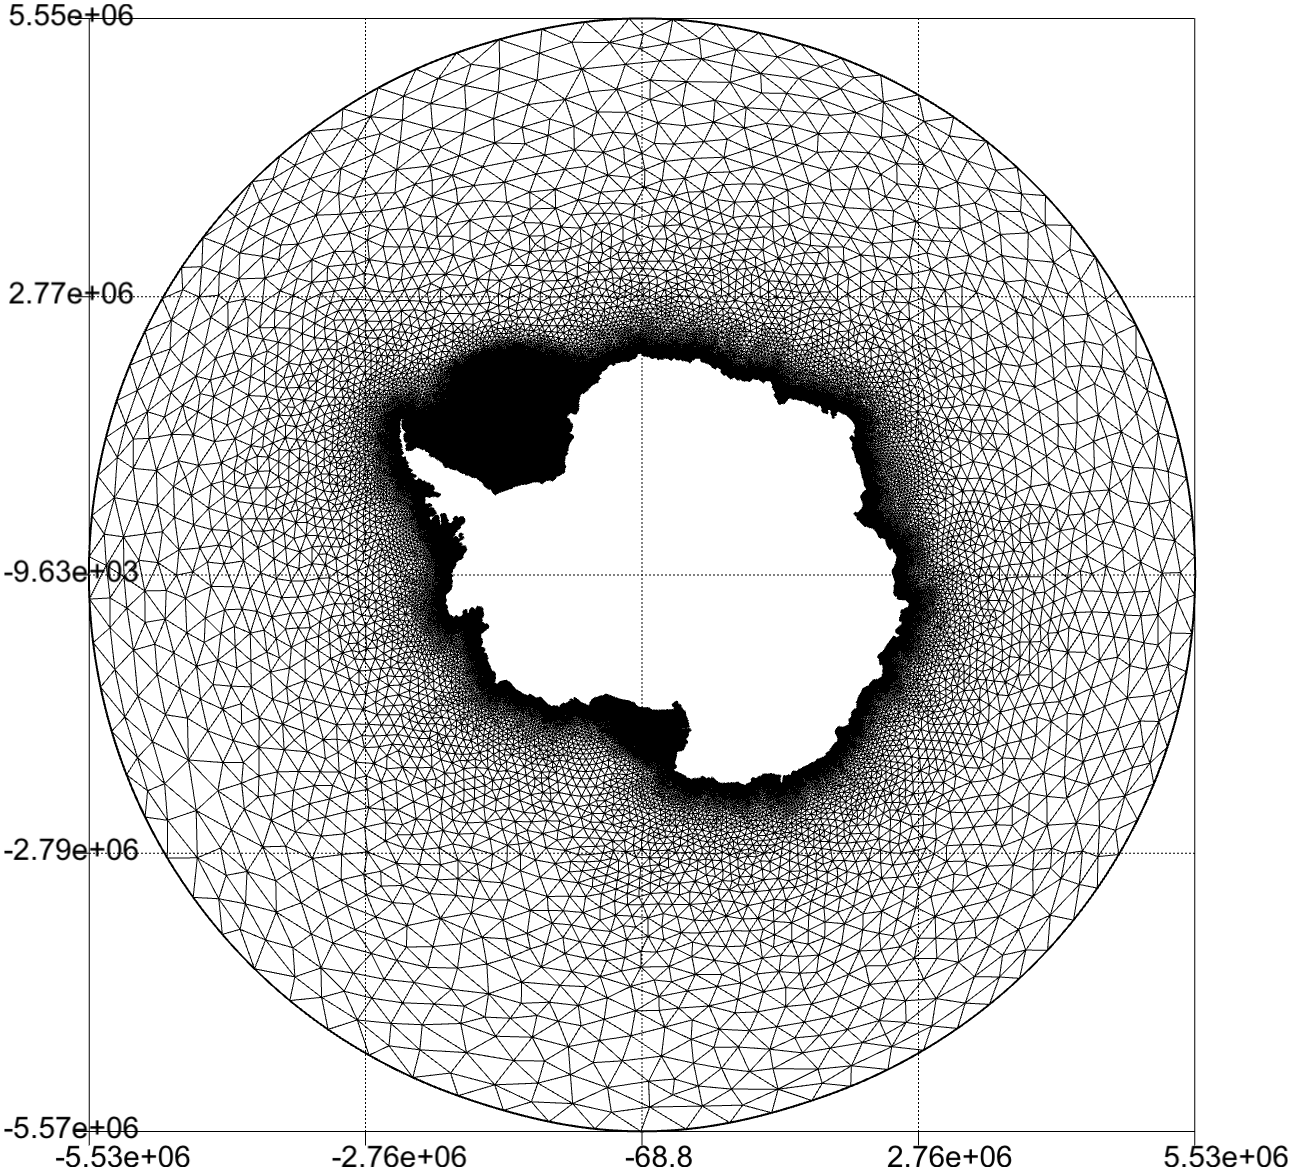

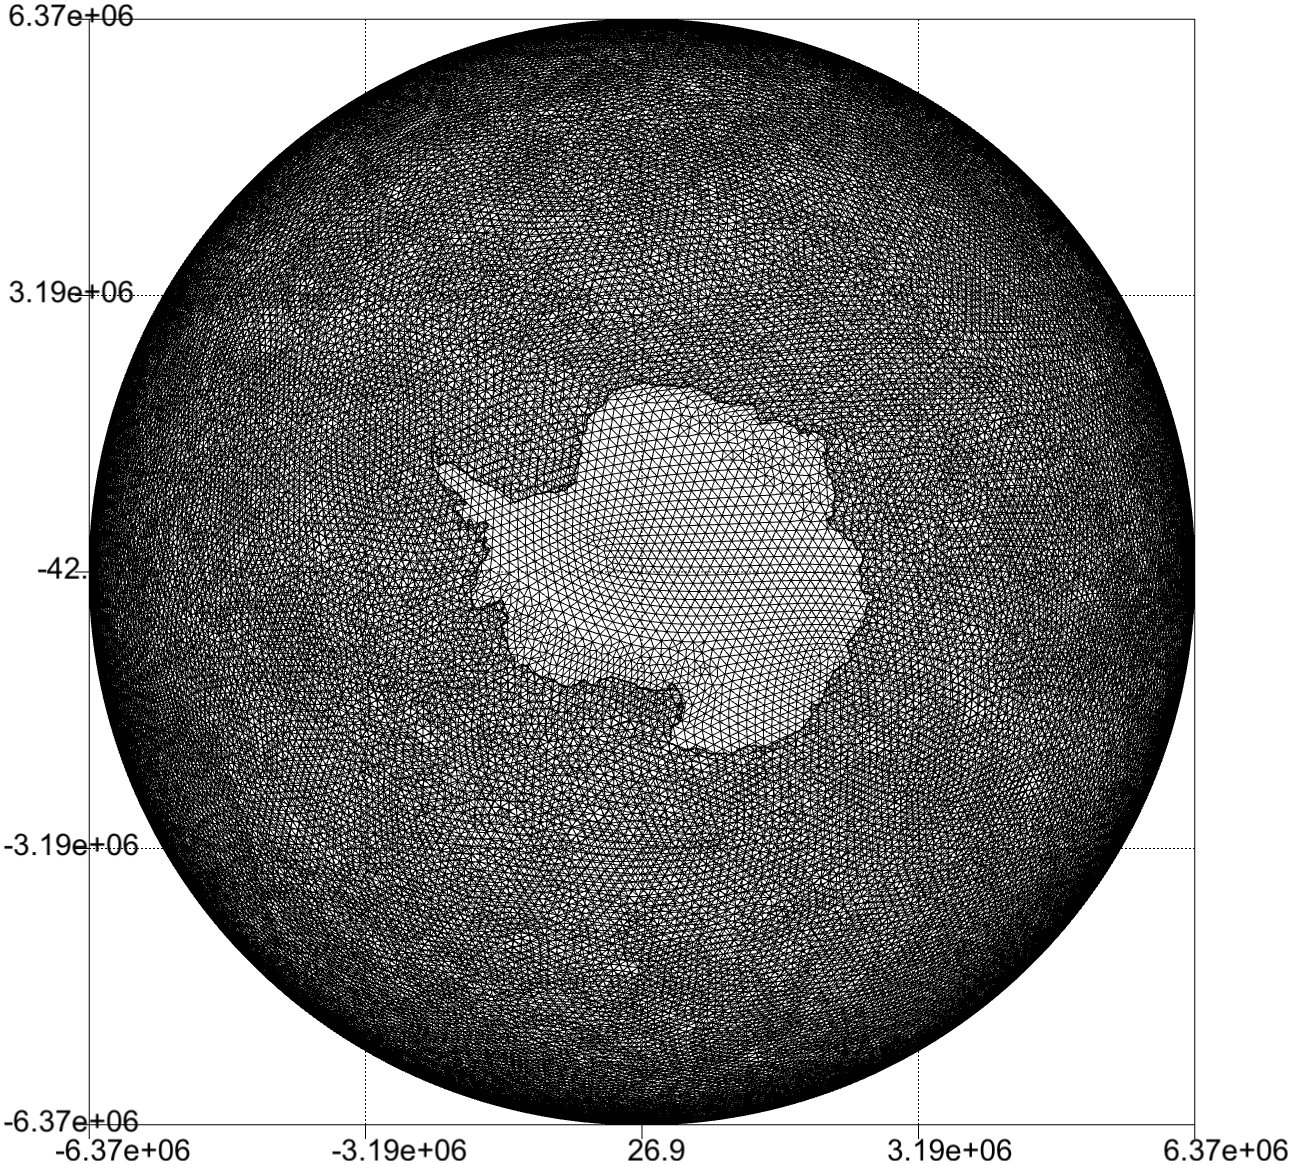

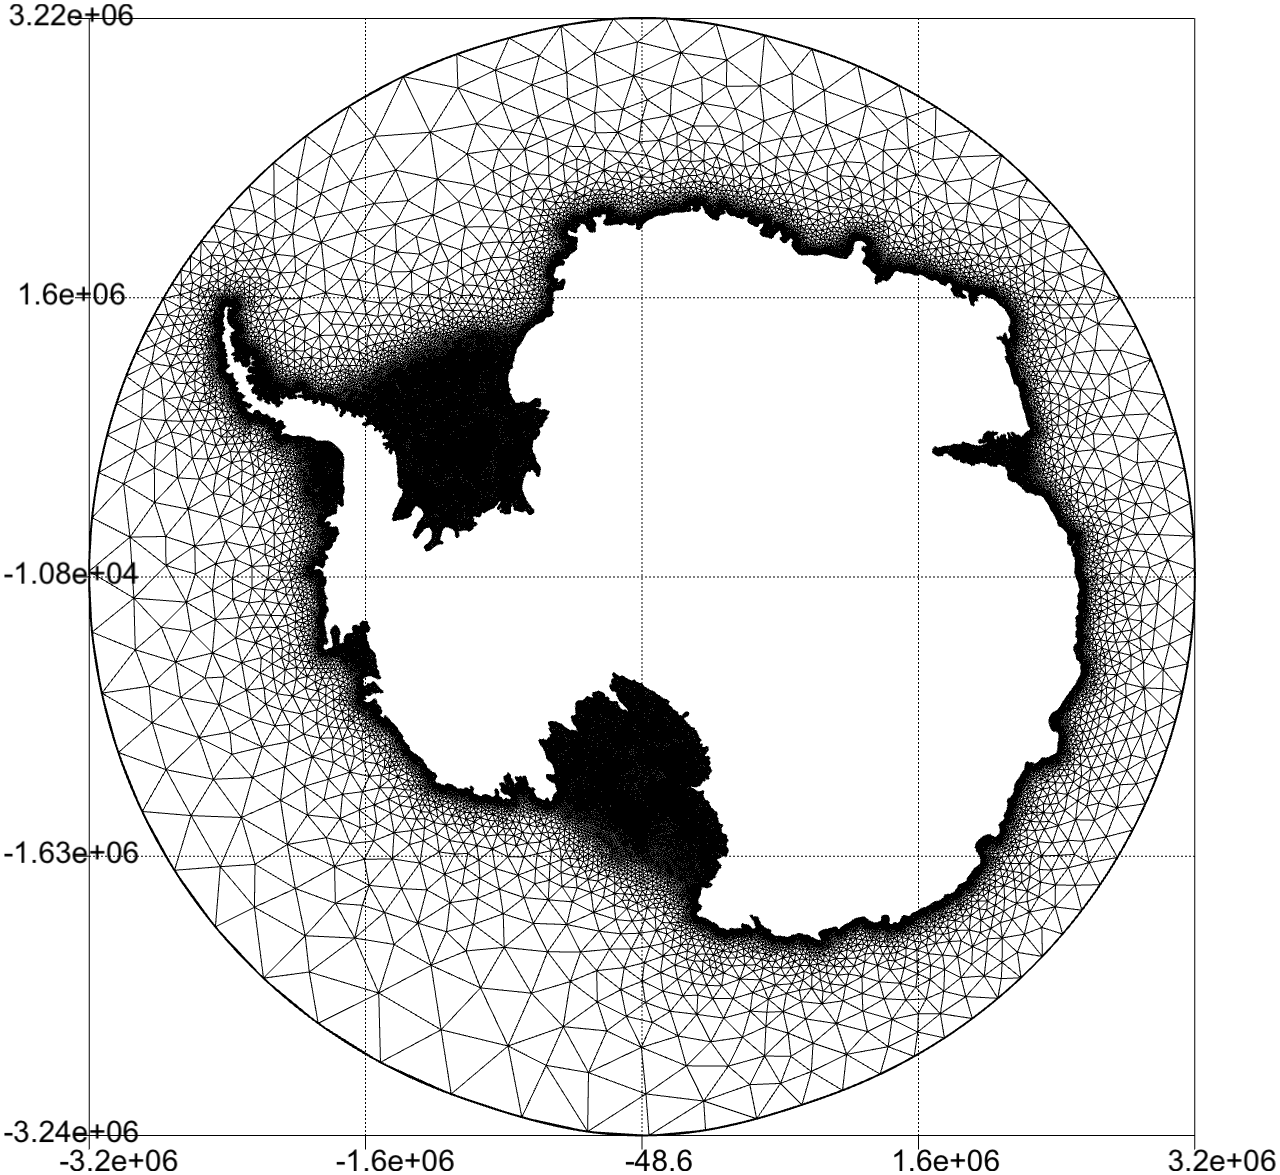

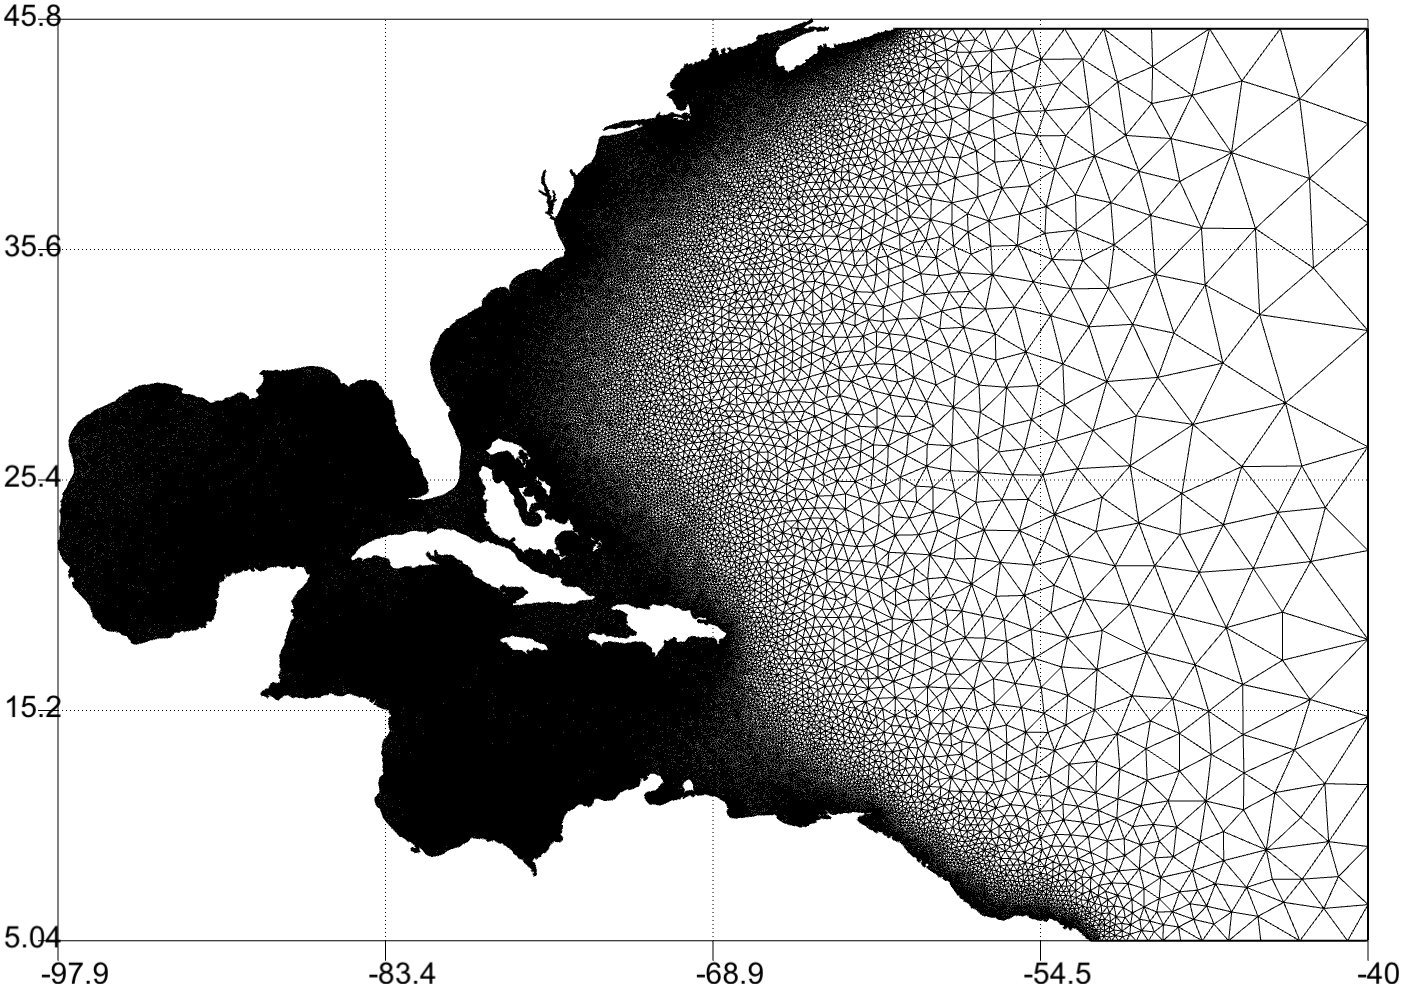

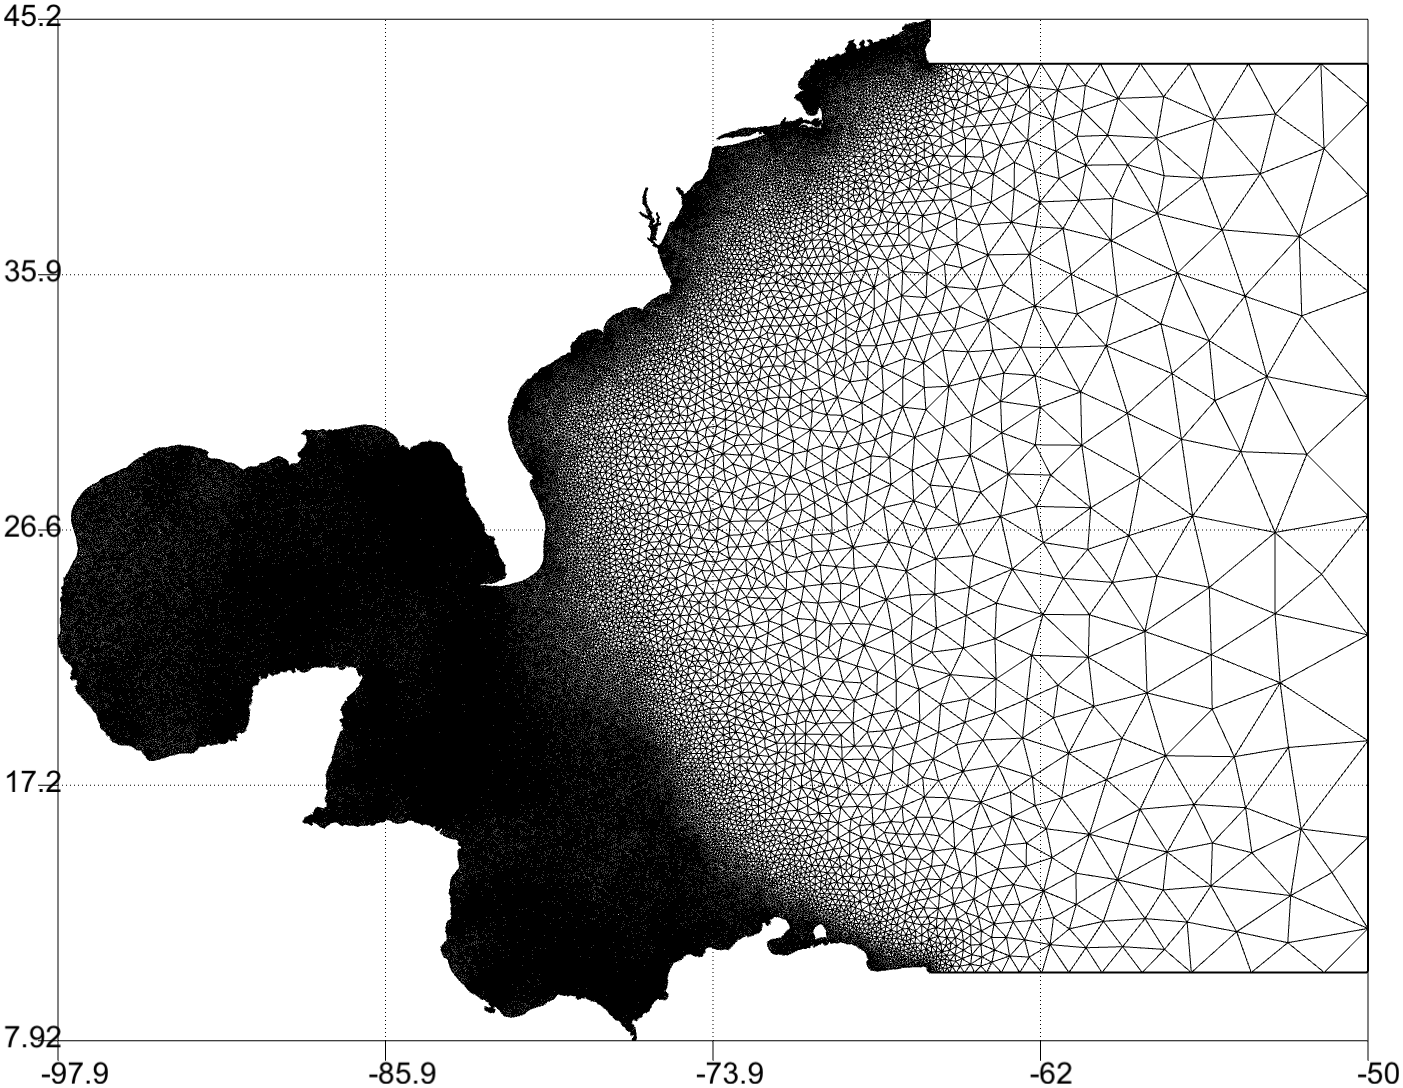

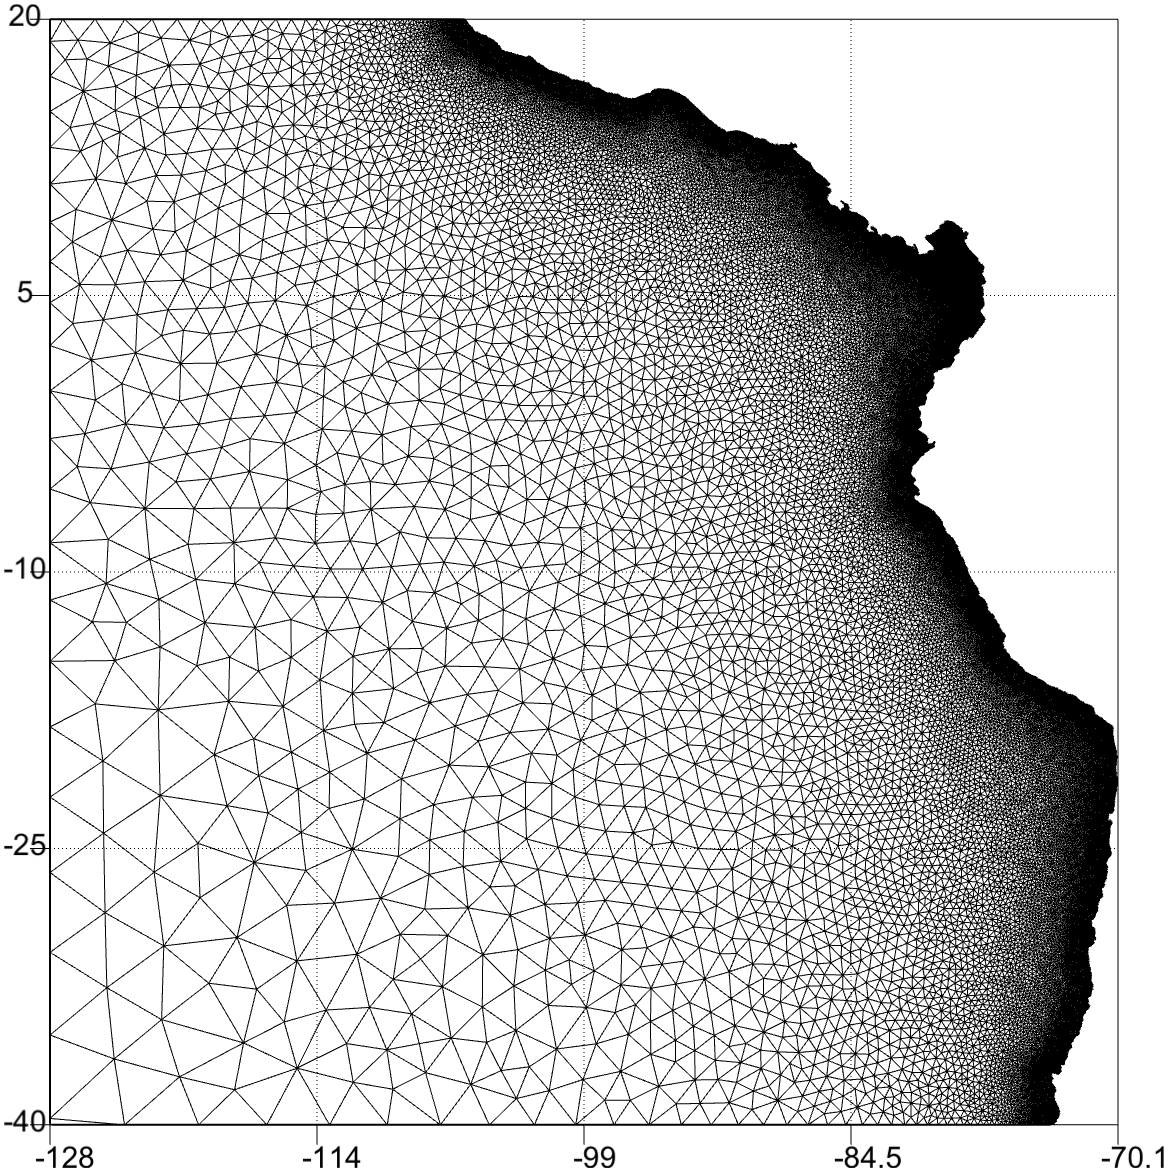

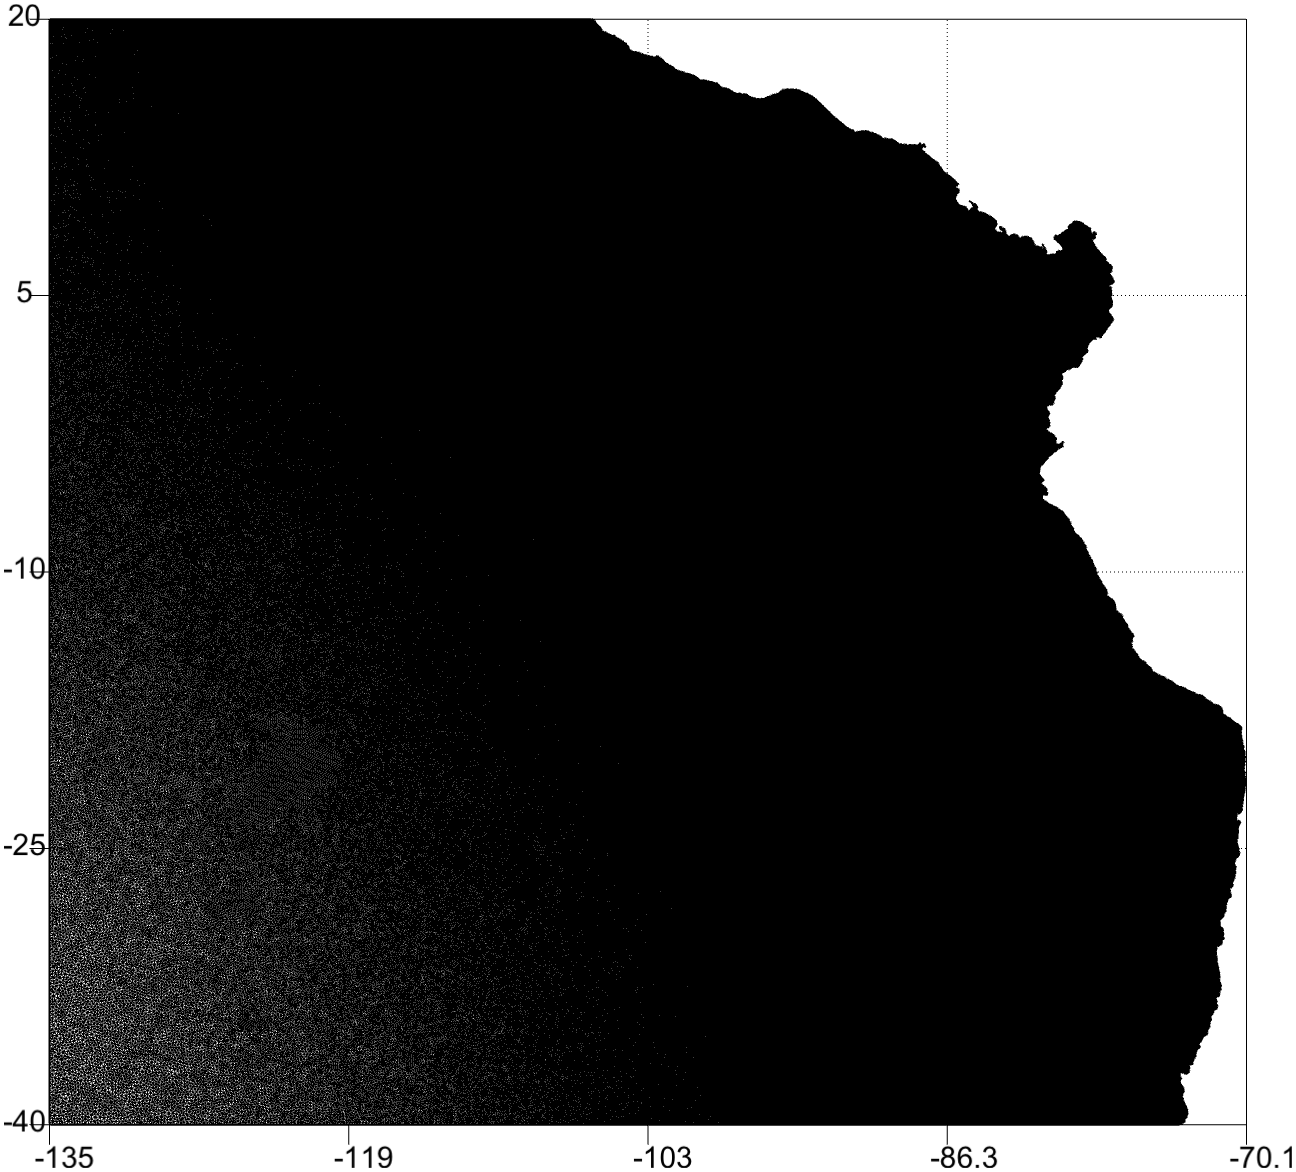

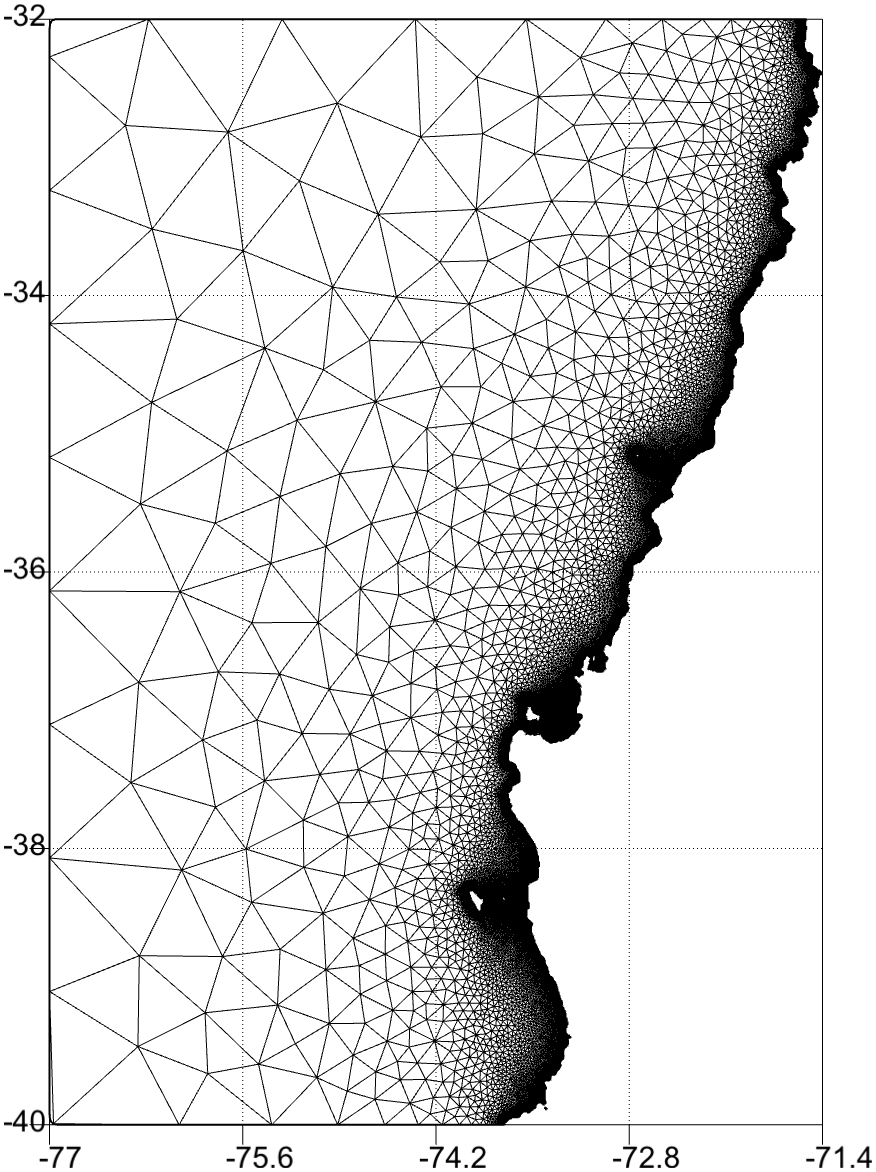

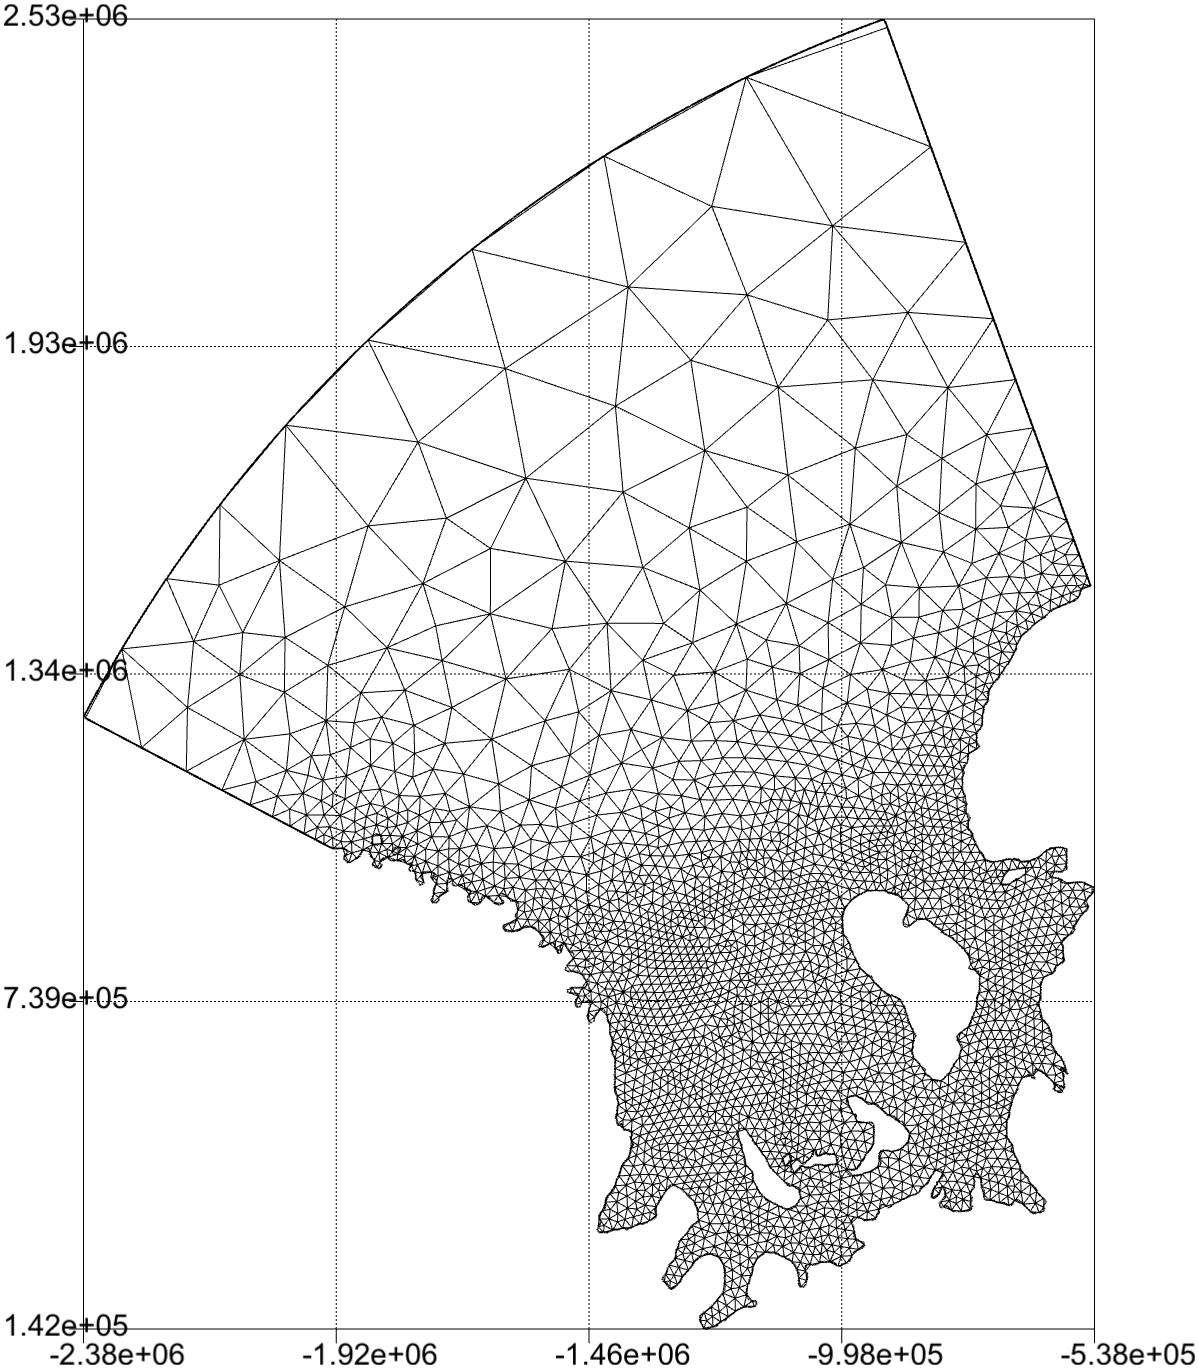

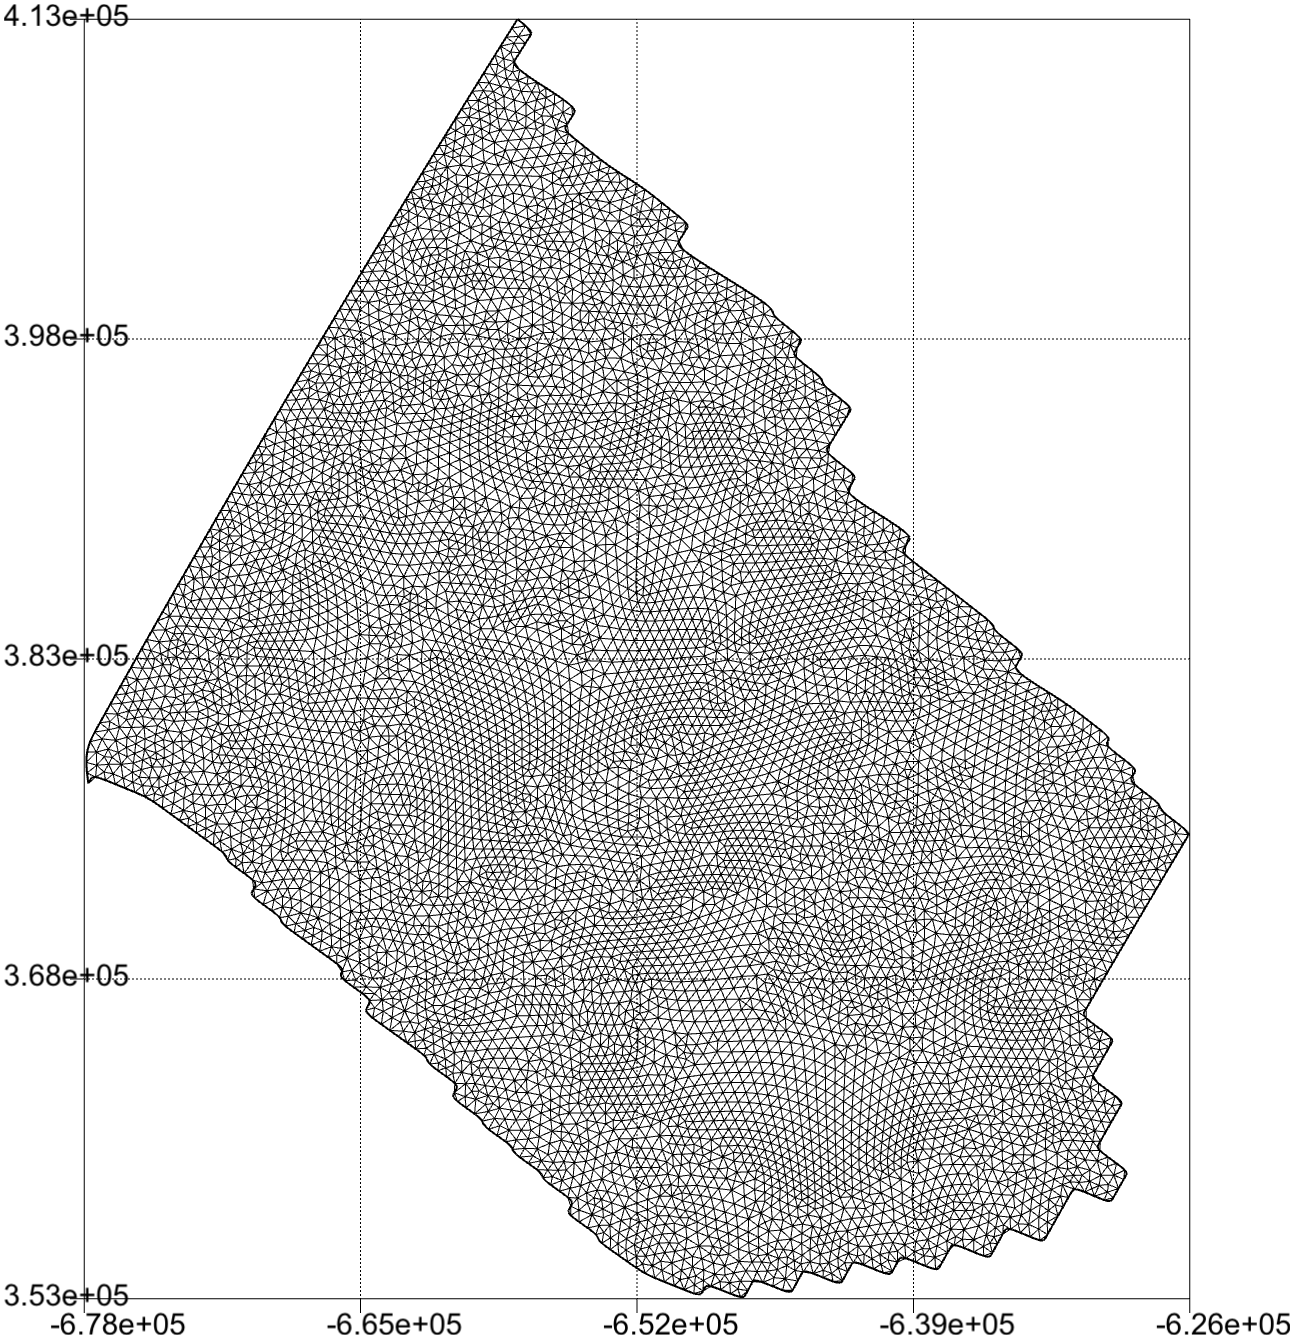

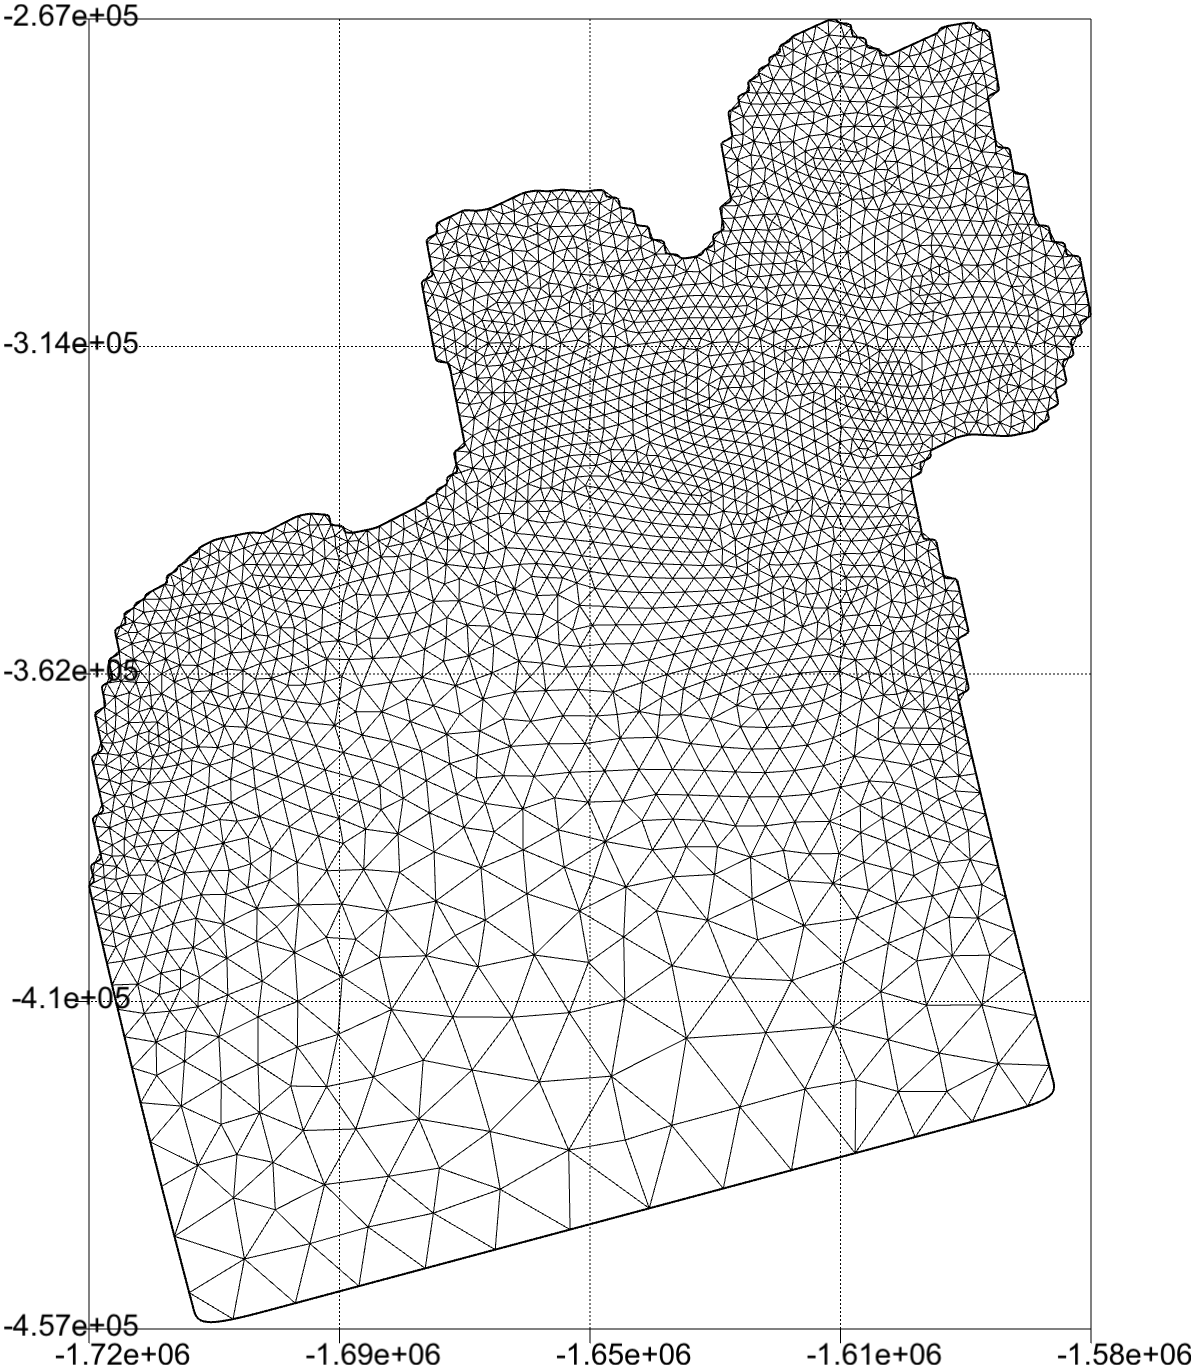

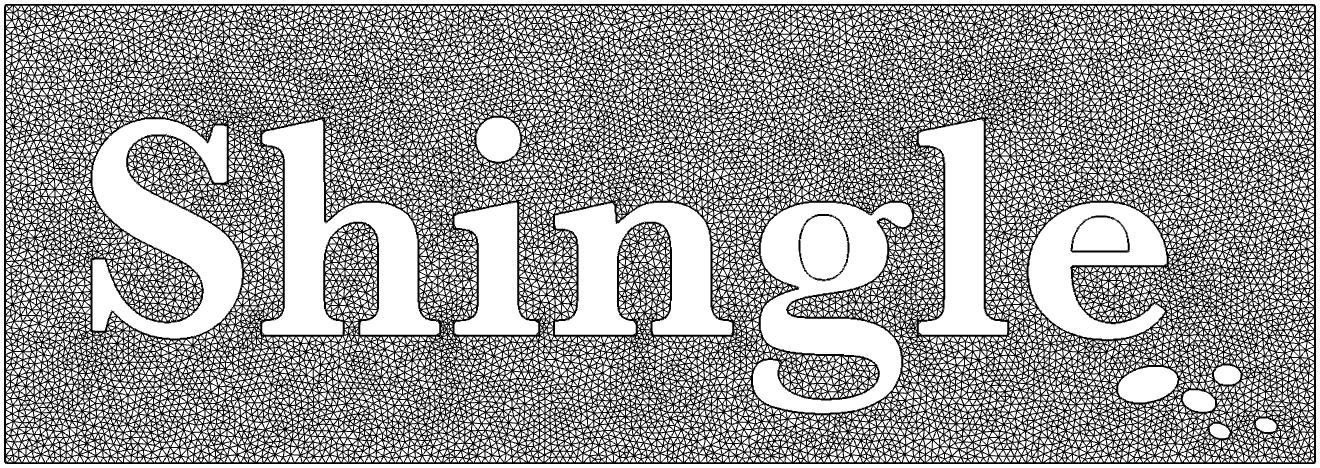

In [1]:
import os, sys
shingle_path = os.path.realpath(os.path.expanduser('~/src/Shingle'))
sys.path.insert(0, shingle_path)

from shingle import Test, SpatialDiscretisation

filename = 'verification_figures.tex'
content = []
test_folder = os.path.expanduser('~/src/Shingle/test')
tests = Test.VerificationTestEngine(locate_only = True, test_folder=test_folder).GetLocations()
#print os.linesep.join(tests)

#import numpy as np
#from matplotlib.pyplot import imshow
#from PIL import Image
#%matplotlib inline

from IPython.display import Image
from IPython.display import display

images = []
for i, test_brml in enumerate(tests):
    s = SpatialDiscretisation.SpatialDiscretisation(test_brml, load_only=True)
    base, ext = os.path.splitext(test_brml)
    image = base + '.png'
    if not os.path.exists(image):
        continue
    print ('''Case %(number)i: %(name)s
  Location: %(filename)s
  Comment: %(comment)s
'''% {
    'number': i,
    'name': s.Name().replace('_', ''),
    'filename': test_brml,
    'comment': s.GetComment().replace(os.linesep,' '),
      }
    )
    #imshow(np.asarray(Image.open(image, 'r')))
    images.append(Image(image))
display(*images)